In [1]:
import tensorflow as tf  
 
# Display the version
print(tf.__version__)    
 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Reshape, Add
from tensorflow.keras.layers import Layer, Softmax, ReLU, Permute, Activation
from tensorflow.keras.models import Model

# import KDL
from KDLayers import *

2.9.1


In [2]:
# Load MNIST
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Build the KDL model
# input layer
i = Input(shape=x_train[0].shape)
 
# KDL layer pairs
x = KDLeftLayer(28, activation='tanh')(i)
x = KDRightLayer(28, activation='tanh')(x)

x = KDLeftLayer(28, activation='tanh')(x)
x = KDRightLayer(28, activation='tanh')(x)
 
x = KDLeftLayer(2, activation='tanh')(x)
x = KDRightLayer(5)(x)

# Reshape for output
x = Reshape((10,))(x)
x = Softmax()(x)

# Build the model
model = Model(i, x)
 
# model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 kd_left_layer (KDLeftLayer)  (None, 28, 28)           1568      
                                                                 
 kd_right_layer (KDRightLaye  (None, 28, 28)           1568      
 r)                                                              
                                                                 
 kd_left_layer_1 (KDLeftLaye  (None, 28, 28)           1568      
 r)                                                              
                                                                 
 kd_right_layer_1 (KDRightLa  (None, 28, 28)           1568      
 yer)                                                            
                                                             

2022-11-18 11:08:20.687414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 6,534
Trainable params: 6,534
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compile
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
hist_KDL = model.fit(
  x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 1.0421 - accuracy: 0.6625 - val_loss: 0.6441 - val_accuracy: 0.8047
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4786 - accuracy: 0.8549 - val_loss: 0.3648 - val_accuracy: 0.8887
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3131 - accuracy: 0.9073 - val_loss: 0.2487 - val_accuracy: 0.9265
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2377 - accuracy: 0.9283 - val_loss: 0.2149 - val_accuracy: 0.9344
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1977 - accuracy: 0.9406 - val_loss: 0.1871 - val_accuracy: 0.9454
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1732 - accuracy: 0.9477 - val_loss: 0.1657 - val_accuracy: 0.9509
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1552 - accuracy: 0.9530 - val_loss: 0.1534 - val_accuracy: 0.9534

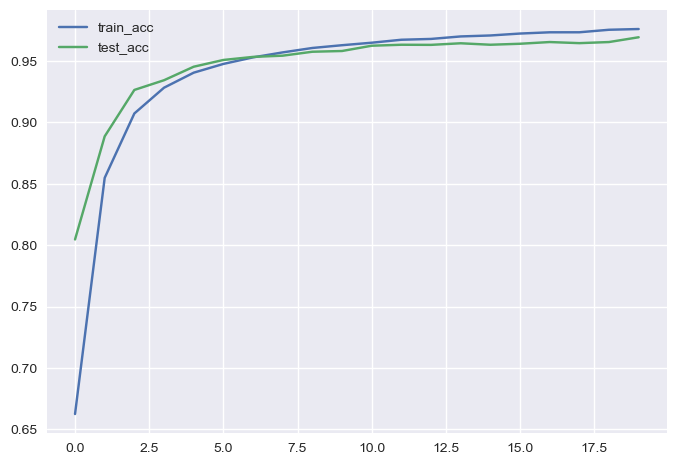

In [6]:
# Plot training and test accuracy
plt.style.use('seaborn')
plt.plot(hist_KDL.history['accuracy'], label='train_acc', color='C0')
plt.plot(hist_KDL.history['val_accuracy'], label='test_acc', color='C1')
plt.legend()

In [7]:
# Build the dense model
# input layer
i = Input(shape=x_train[0].shape)
x = Flatten()(i)
 
# Hidden layers
x = Dense(784, activation='tanh')(x)

x = Dense(784, activation='tanh')(x)
 
x = Dense(10, activation='softmax')(x)

# Build the model
model = Model(i, x)
 
# model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
hist_dense = model.fit(
  x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 0.3869 - accuracy: 0.8894 - val_loss: 0.2890 - val_accuracy: 0.9156
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2771 - accuracy: 0.9204 - val_loss: 0.2594 - val_accuracy: 0.9238
Epoch 3/20
469/469 [==============================] - 8s 18ms/step - loss: 0.2352 - accuracy: 0.9323 - val_loss: 0.2216 - val_accuracy: 0.9341
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1958 - accuracy: 0.9438 - val_loss: 0.1755 - val_accuracy: 0.9497
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1640 - accuracy: 0.9523 - val_loss: 0.1643 - val_accuracy: 0.9501
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1396 - accuracy: 0.9597 - val_loss: 0.1460 - val_accuracy: 0.9572
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1210 - accuracy: 0.9646 - val_loss: 0.1237 - val_accuracy: 0.

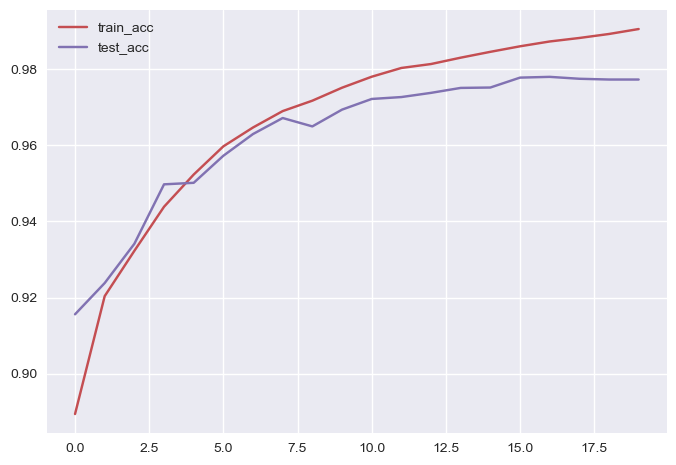

In [10]:
# Plot training and test accuracy
plt.plot(hist_dense.history['accuracy'], label='train_acc', color='C2')
plt.plot(hist_dense.history['val_accuracy'], label='test_acc', color='C3')
plt.legend()

In [11]:
# Build a KDL model with Kronecker rank 2
# input layer
i = Input(shape=x_train[0].shape)

# Hidden layer pairs
x1 = KDLeftLayer(28, activation='tanh')(i)
x1 = KDRightLayer(28)(x1)

x2 = KDLeftLayer(28, activation='tanh')(i)
x2 = KDRightLayer(28)(x2)

# Combine Result
x = Add()([x1,x2])
x = Activation('tanh')(x)

# Another set of layer pairs
x1 = KDLeftLayer(28, activation='tanh')(x)
x1 = KDRightLayer(28)(x1)

x2 = KDLeftLayer(28, activation='tanh')(x)
x2 = KDRightLayer(28)(x2)

x = Add()([x1,x2])
x = Activation('tanh')(x)

# Final set of Layer pairs
x1 = KDLeftLayer(2, activation='tanh')(x)
x1 = KDRightLayer(5)(x1)

x2 = KDLeftLayer(2, activation='tanh')(x)
x2 = KDRightLayer(5)(x2)

x = Add()([x1,x2])

# Reshape for output
x = Reshape((10,))(x)
x = Softmax()(x)
model = Model(i, x)
 
# model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 kd_left_layer_3 (KDLeftLayer)  (None, 28, 28)       1568        ['input_3[0][0]']                
                                                                                                  
 kd_left_layer_4 (KDLeftLayer)  (None, 28, 28)       1568        ['input_3[0][0]']                
                                                                                                  
 kd_right_layer_3 (KDRightLayer  (None, 28, 28)      1568        ['kd_left_layer_3[0][0]']        
 )                                                                                          

In [12]:
# Compile
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
hist_KDL2 = model.fit(
  x_train, y_train, batch_size=128, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
469/469 [==============================] - 9s 17ms/step - loss: 0.5158 - accuracy: 0.8440 - val_loss: 0.2761 - val_accuracy: 0.9221
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2436 - accuracy: 0.9277 - val_loss: 0.2077 - val_accuracy: 0.9374
Epoch 3/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1920 - accuracy: 0.9433 - val_loss: 0.1736 - val_accuracy: 0.9473
Epoch 4/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1598 - accuracy: 0.9524 - val_loss: 0.1526 - val_accuracy: 0.9538
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1382 - accuracy: 0.9589 - val_loss: 0.1429 - val_accuracy: 0.9567
Epoch 6/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1226 - accuracy: 0.9634 - val_loss: 0.1287 - val_accuracy: 0.9600
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1105 - accuracy: 0.9666 - val_loss: 0.1164 - val_accuracy: 0.965

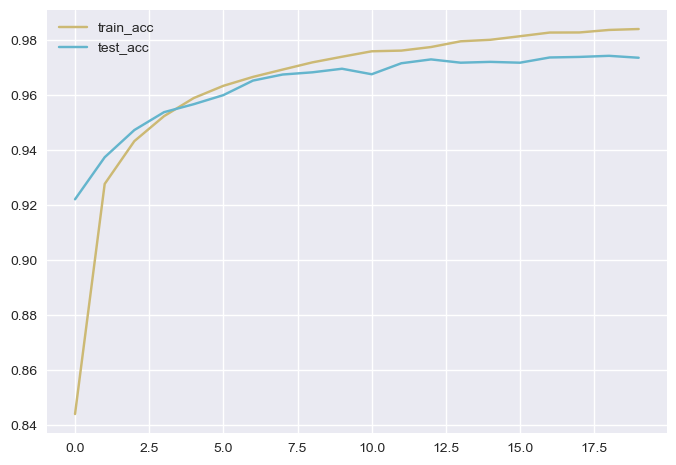

In [14]:
# Plot training and test accuracy
plt.plot(hist_KDL2.history['accuracy'], label='train_acc', color='C4')
plt.plot(hist_KDL2.history['val_accuracy'], label='test_acc', color='C5')
plt.legend()

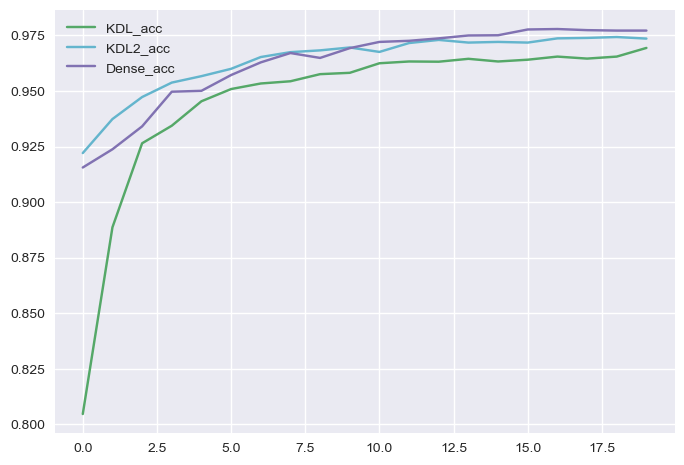

In [15]:
# Plot test accuracy comparison
plt.plot(hist_KDL.history['val_accuracy'], label='KDL_acc', color='C1')
plt.plot(hist_KDL2.history['val_accuracy'], label='KDL2_acc', color='C5')
plt.plot(hist_dense.history['val_accuracy'], label='Dense_acc', color='C3')
plt.legend()